# Shot \#30554

In [98]:
import matplotlib.pyplot as plt
import numpy as np
import dd
from ddremoveELMData import *
from getsig import getsig
plt.style.use('helvet2')

### First interval

In [3]:
shotnr = 30554
ti = 2.4
tf = 2.6

In [93]:
rps = dd.shotfile('RPS', shotnr, edition=2)
nl = rps('neb_LFS')
rl = rps('RB_LFS')
nh = rps('neb_HFS')
rh = rps('RB_HFS')
tref = rps('TIME')
rps.close()

In [94]:
mask1 = ddremoveELMData(shotnr, tref, preft=0.002, suft=0.005, elm_exper="guimas")

In [95]:
tinterval = (tref>=ti)&(tref<=tf)&(mask1)

In [96]:
nlt = nl.data[tinterval,:]
rlt = rl.data[tinterval,:]
qua = nlt>3e18

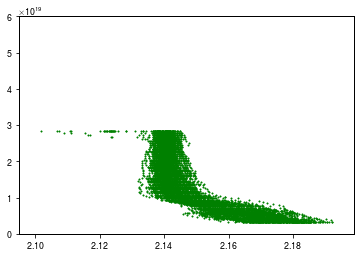

In [97]:
plt.scatter(rlt[qua], nlt[qua],s=2, c='g')
plt.ylim(0,6e19)
plt.show()

In [99]:
lin = getsig(shotnr, 'LIN', 'ne')

/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:1090: RuntimeWarning: Length of time base & 1st index of signal group "ne" not matching. Ignoring tBegin/tEnd as a precaution.
  RuntimeWarning)
/afs/ipp/aug/ads-diags/common/python/lib/dd_20180216.py:117: RuntimeWarning: Warning by DDcsgrp (8.1): No PARAM_SET found
  warnings.warn(text.replace('\x00','').strip(), RuntimeWarning)


In [105]:
masklin = ddremoveELMData(shotnr, lin.time, preft=0.003, suft=0.005, elm_exper="guimas")

In [106]:
linterval = (lin.time>=ti)&(lin.time<=tf)&(masklin)

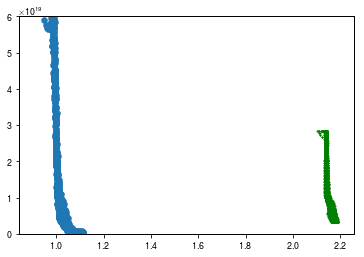

In [108]:
plt.scatter(rlt[qua], nlt[qua],s=2, c='g')
plt.scatter(lin.area.data[linterval,:],lin.data[linterval,:])
plt.ylim(0,6e19)
plt.show()